Notes:

[Segmentation of CT Scan with Python
](https://medium.com/@dinuScripnic/segmentation-of-ct-scan-with-python-21e298411443)

In [210]:
!pip install pydicom
import pydicom
from pydicom.data import get_testdata_file
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import copy
from skimage.metrics import structural_similarity
from PIL import Image
from scipy import ndimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [192]:
path = r"/content/drive/MyDrive/PIM/TesteDicom"

#### 1

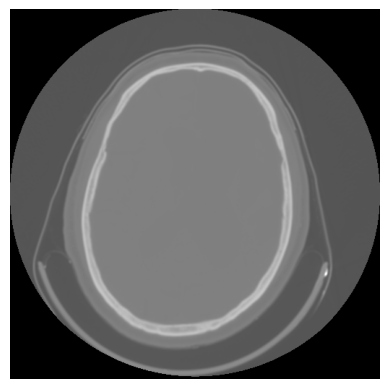

In [193]:
import os
import pydicom
import matplotlib.pyplot as plt

# Define the directory path
path = r"/content/drive/MyDrive/PIM/TesteDicom"

# Define the DICOM file name
pass_dicom = "CT000009.dcm"

dicom_path = os.path.join(path_ressonancia, pass_dicom)

ds = pydicom.dcmread(dicom_path)

plt.imshow(ds.pixel_array, cmap="gray")
plt.gca().set_axis_off()
plt.show()


#### 2

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


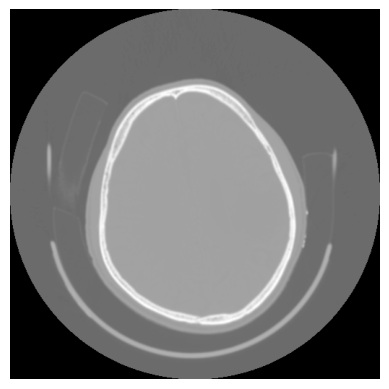

In [194]:
pass_dicom = "CT000086.dcm"

dicom_path = os.path.join(path, pass_dicom)

ds = pydicom.dcmread(dicom_path)

plt.imshow(ds.pixel_array, cmap="gray")
plt.gca().set_axis_off()
plt.show()

#### 3

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


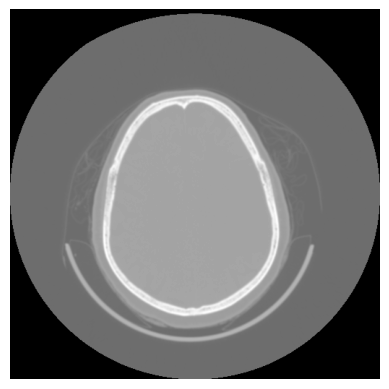

In [195]:
pass_dicom = "CT000097.dcm"

dicom_path = os.path.join(path, pass_dicom)

ds = pydicom.dcmread(dicom_path)

plt.imshow(ds.pixel_array, cmap="gray")
plt.gca().set_axis_off()
plt.show()

#### 4

In [46]:
!pip install SimpleITK

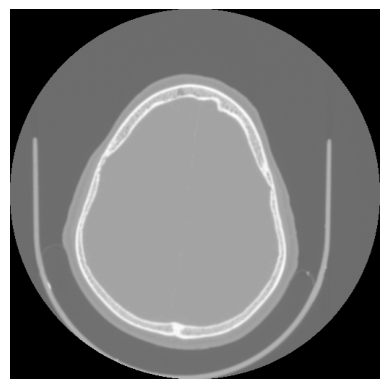

In [196]:
pass_dicom = "CT000102.dcm"

dicom_path = os.path.join(path, pass_dicom)

image = sitk.ReadImage(dicom_path)
array = sitk.GetArrayFromImage(image)

plt.imshow(array[0], cmap="gray")
plt.gca().set_axis_off()
plt.show()

#### 5

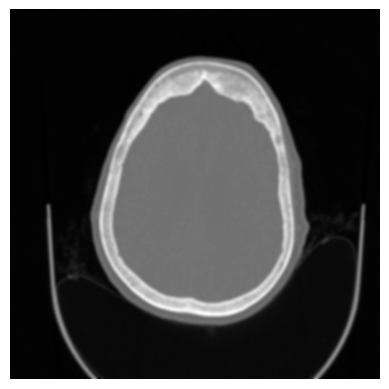

In [197]:
pass_dicom = "CT000130.dcm"

dicom_path = os.path.join(path, pass_dicom)

ds = pydicom.dcmread(dicom_path)

plt.imshow(ds.pixel_array, cmap="gray")
plt.gca().set_axis_off()
plt.show()

# Limiarização do crânio

### 1

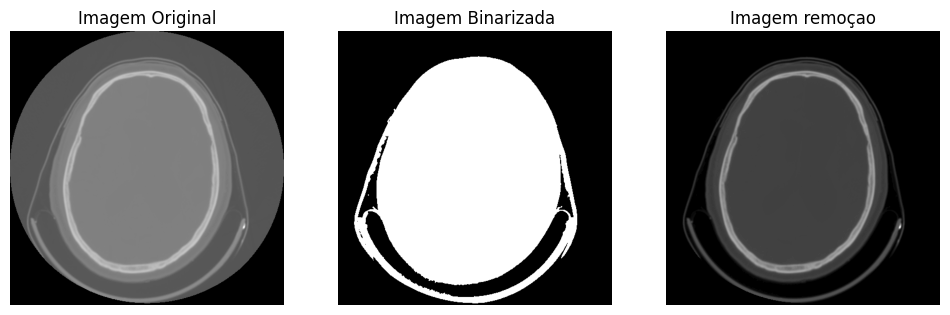

In [198]:
pass_dicom = "CT000009.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

threshold_value = 120

binary_image = np.where(image > threshold_value, 1, 0)
skull_pixels = np.where(binary_image == 1, 1, 0)
result_image = image * skull_pixels

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.gca().set_axis_off()
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.gca().set_axis_off()

plt.subplot(1, 3, 3)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem remoçao')
plt.gca().set_axis_off()
plt.show()

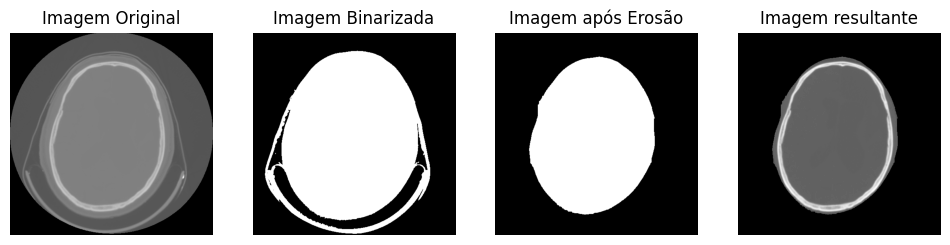

In [199]:
def perform_erosion(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image.astype(np.uint8), kernel, iterations=1)

pass_dicom = "CT000009.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

# Binarização da imagem
threshold_value = 120
binary_image = np.where(image > threshold_value, 1, 0)

# Aplicar a erosão
erosion_result = perform_erosion(binary_image, kernel_size=28)
result_image = image * erosion_result
# Plotar as imagens
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(erosion_result, cmap='gray')
plt.title('Imagem após Erosão')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem resultante')
plt.axis('off')

plt.show()


### 2

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


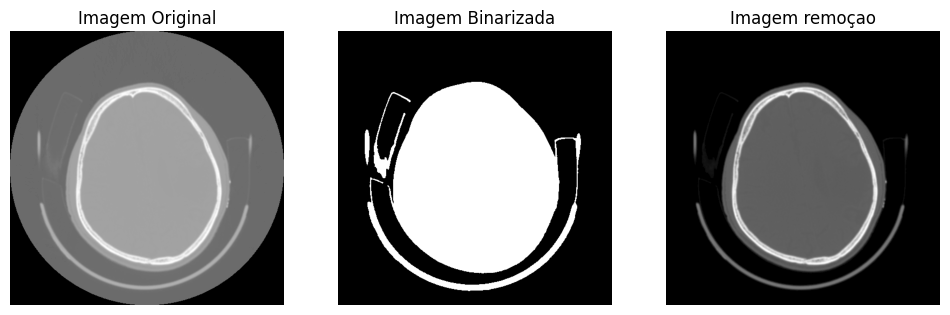

In [200]:
pass_dicom = "CT000086.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

threshold_value = 120

binary_image = np.where(image > threshold_value, 1, 0)
skull_pixels = np.where(binary_image == 1, 1, 0)
result_image = image * skull_pixels

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.gca().set_axis_off()
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.gca().set_axis_off()

plt.subplot(1, 3, 3)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem remoçao')
plt.gca().set_axis_off()
plt.show()

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


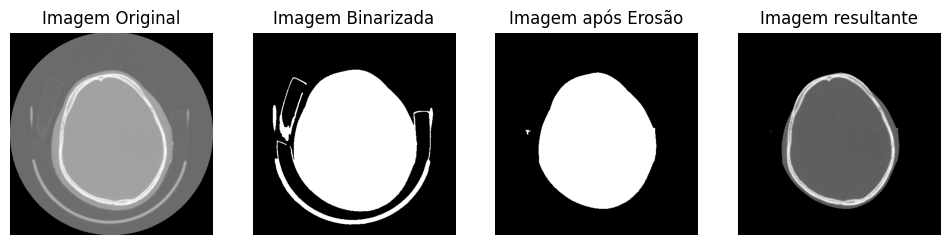

In [201]:
def perform_erosion(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image.astype(np.uint8), kernel, iterations=1)

pass_dicom = "CT000086.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array


threshold_value = 120
binary_image = np.where(image > threshold_value, 1, 0)

erosion_result = perform_erosion(binary_image, kernel_size=14)
result_image = image * erosion_result


plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(erosion_result, cmap='gray')
plt.title('Imagem após Erosão')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem resultante')
plt.axis('off')

plt.show()


### 3

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


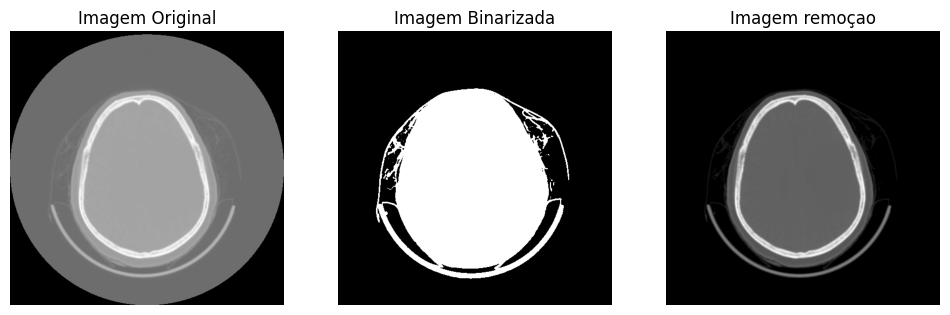

In [202]:
pass_dicom = "CT000097.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

threshold_value = 120

binary_image = np.where(image > threshold_value, 1, 0)
skull_pixels = np.where(binary_image == 1, 1, 0)
result_image = image * skull_pixels

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.gca().set_axis_off()
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.gca().set_axis_off()

plt.subplot(1, 3, 3)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem remoçao')
plt.gca().set_axis_off()
plt.show()

/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (16-bit) doesn't match the JPEG 2000 data (14-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


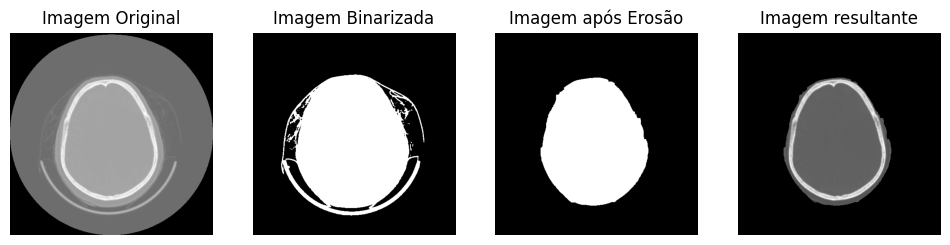

In [203]:
def perform_erosion(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image.astype(np.uint8), kernel, iterations=1)

pass_dicom = "CT000097.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

# Binarização da imagem
threshold_value = 120
binary_image = np.where(image > threshold_value, 1, 0)

# Aplicar a erosão
erosion_result = perform_erosion(binary_image, kernel_size=14)
result_image = image * erosion_result


plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(erosion_result, cmap='gray')
plt.title('Imagem após Erosão')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem resultante')
plt.axis('off')

plt.show()


### 4

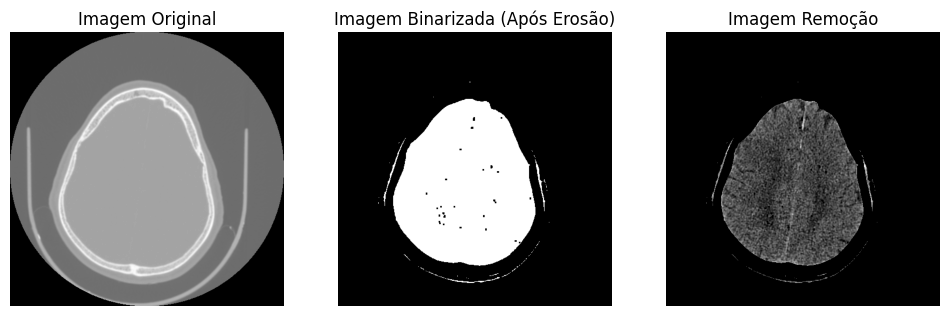

In [204]:
import SimpleITK as sitk

pass_dicom = "CT000102.dcm"
dicom_path = os.path.join(path, pass_dicom)

image = sitk.ReadImage(dicom_path)

# Binarização da imagem
threshold_value = 120
binary_image = sitk.BinaryThreshold(image, lowerThreshold=0, upperThreshold=threshold_value, insideValue=1, outsideValue=0)

# Aplicar erosão à imagem binarizada para remover ruídos
eroded_image = sitk.BinaryErode(binary_image, [1, 1, 1])

# Converter a imagem erodida para o mesmo tipo de pixel da imagem original
eroded_image = sitk.Cast(eroded_image, image.GetPixelID())


result_image = sitk.Multiply(image, eroded_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(sitk.GetArrayViewFromImage(image)[0], cmap='gray')
plt.title('Imagem Original')
plt.gca().set_axis_off()

plt.subplot(1, 3, 2)
plt.imshow(sitk.GetArrayViewFromImage(eroded_image)[0], cmap='gray')
plt.title('Imagem Binarizada (Após Erosão)')
plt.gca().set_axis_off()

plt.subplot(1, 3, 3)
plt.imshow(sitk.GetArrayViewFromImage(result_image)[0], cmap='gray')
plt.title('Imagem Remoção')
plt.gca().set_axis_off()

plt.show()


### 5

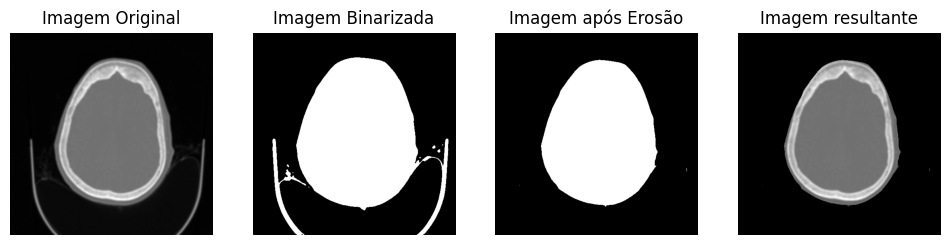

In [206]:
def perform_erosion(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image.astype(np.uint8), kernel, iterations=1)

pass_dicom = "CT000130.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

threshold_value = 200
binary_image = np.where(image > threshold_value, 1, 0)

# erosão
erosion_result = perform_erosion(binary_image, kernel_size=12)
result_image = image * erosion_result

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(erosion_result, cmap='gray')
plt.title('Imagem após Erosão')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem resultante')
plt.axis('off')

plt.show()


Otsu

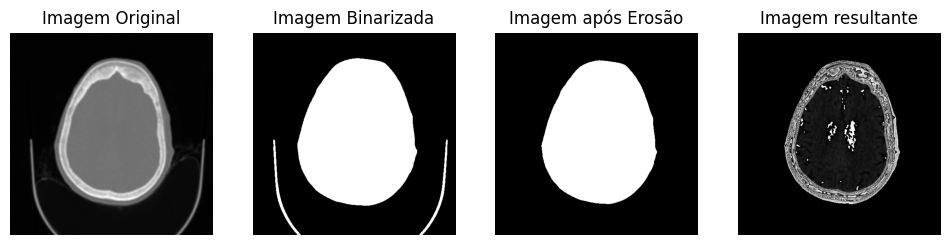

In [207]:
def perform_erosion(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image.astype(np.uint8), kernel, iterations=1)

pass_dicom = "CT000130.dcm"
dicom_path = os.path.join(path, pass_dicom)
ds = pydicom.dcmread(dicom_path)
image = ds.pixel_array

_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Aplicar a erosão
erosion_result = perform_erosion(binary_image, kernel_size=10)
result_image = image * erosion_result

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(erosion_result, cmap='gray')
plt.title('Imagem após Erosão')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result_image, cmap='gray')
plt.title('Imagem resultante')
plt.axis('off')

plt.show()


# 3D

[Read DICOM Series and Write 3D Image](https://examples.itk.org/src/io/gdcm/readdicomseriesandwrite3dimage/documentation)

[Advanced DICOM-CT 3D visualizations with VTK](https://www.kaggle.com/code/wrrosa/advanced-dicom-ct-3d-visualizations-with-vtk)

[How to Extract Lung Images from CT-Scan DICOMs Using Python: A Step-by-Step Guide](https://medium.com/@davidbobek/how-to-extract-lung-images-from-ct-scan-dicoms-using-python-a-step-by-step-guide-c51e204f4275)

In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 21.2 MB/s eta 0:00:00


In [ ]:
import os
import SimpleITK as sitk
import numpy as np

# Specify the folder containing DICOM files
folder_path = "/content/drive/MyDrive/PIM/ATVD08/Tc_Abdomen_Normal_A/Abdomen_Abdome_Rotina_19_A_30Cm_(Child) - 1/VOLUME_CC_2"

# Get the list of DICOM files in the folder
dicom_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.dcm')]

# Read the DICOM series
reader = sitk.ImageSeriesReader()
reader.SetFileNames(dicom_files)
image = reader.Execute()

# Convert the 3D image to a NumPy array
volume = sitk.GetArrayFromImage(image)

# Access metadata (same for all DICOM files in the folder)
first_file = dicom_files[0]
first_dataset = sitk.ReadImage(first_file)
